## First we will import all required libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn
import warnings # Removing all warnings from the projects thrown by different libraries
warnings.filterwarnings('ignore')

In [61]:
# setting up the size of the figures
plt.rcParams['figure.figsize'] = (16,5)
# setting up the style of the plot
plt.style.use('fivethirtyeight')

## Reading Dataset

In [62]:
train_dataset = pd.read_csv('train.csv') # train dataset imported to pandas
test_dataset = pd.read_csv('test.csv') # test dataset imported to pandas

# Examining the dataset

In [63]:
# checking the shape of the train and test dataset
print("shape of the Training dataset:", train_dataset.shape)
print("shape of the testing dataset:", test_dataset.shape)

shape of the Training dataset: (54808, 14)
shape of the testing dataset: (23490, 13)


In [64]:
# checking columns in Training dataset
train_dataset.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [65]:
# checking columns in Testing dataset
test_dataset.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [7]:
# Checking the head of the training dataset
train_dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
# Checking the head of the testing dataset
test_dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [9]:
# checking the tail of the training dataset
train_dataset.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [10]:
# checking the tail of the testing dataset
test_dataset.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [11]:
# values in Departments
train_dataset['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [12]:
#values in Region
train_dataset['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [13]:
# values in education
train_dataset['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

## Descriptive Statistics

In [14]:
# checking descriptive statistics for numerical columns
train_dataset.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


From the descriptive statistics we can see that there is no outliers in our dataset.
Also , the length of service is not having very distruptive values so we can keep them for model training.

In [15]:
# checking descriptive statistics for categorical columns
train_dataset.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


## Target class balance

In [16]:
# is_promoted is our target class because we need to check 
# a employee is promoted or not
train_dataset['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

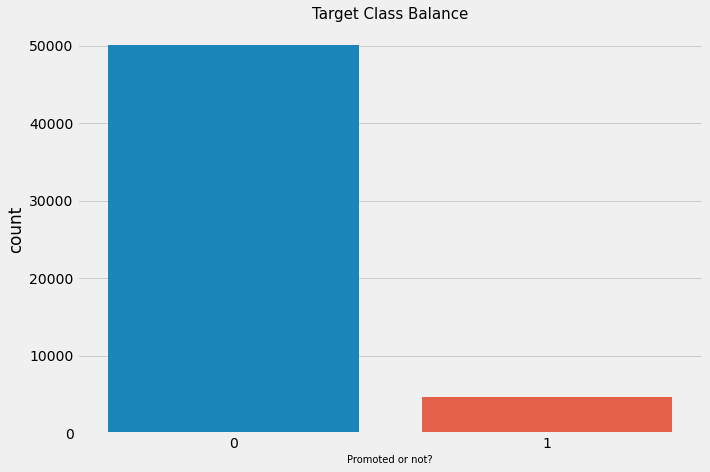

In [17]:
plt.rcParams['figure.figsize'] = (10,7)
plt.style.use('fivethirtyeight')
sns.countplot(train_dataset['is_promoted'])
plt.xlabel('Promoted or not?',fontsize = 10)
plt.title('Target Class Balance',fontsize = 15)
plt.show()

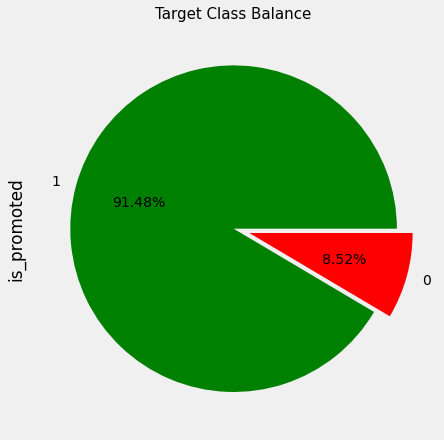

In [18]:
plt.rcParams['figure.figsize'] = (10,7)
plt.style.use('fivethirtyeight')
train_dataset['is_promoted'].value_counts().plot(kind = 'pie', explode = [0,0.1],
                                                autopct = '%.2f%%', labels = ['1','0'],colors = ['g','r'])
plt.title('Target Class Balance',fontsize = 15)
plt.show()

We can easily, see that our target class is highly Imbalanced, we must balance these classes of target class. Most of the Times, when we use Machine Learning Models with Imbalanced classes, we have very poor results which are completely baised towards the class having hogher distributions.

## Treatment of Misssing Values

In [19]:
# missing values in a training data set

#calculating the total missing values in a training dataset
train_total = train_dataset.isnull().sum()

#calculating the percentage of missing values in the testing dataset
train_percent = ((train_dataset.isnull().sum()/train_dataset.shape[0])*100).round(2)

#calculating the total missing values in a testing dataset
test_total = test_dataset.isnull().sum()

#calculating the percentage of missing values in the testing dataset
test_percent = ((test_dataset.isnull().sum()/test_dataset.shape[0])*100).round(2)

#making a dataset consisting of total no. of missing values and percentage of misssing values in both dataset.
missing_data = pd.concat([train_total,train_percent,test_total,test_percent],
                        axis = 1,keys=['Train_total','Train_percent %','Test_total','Test_percent %'],sort = True)
print(missing_data)

                      Train_total  Train_percent %  Test_total  Test_percent %
KPIs_met >80%                   0             0.00         0.0            0.00
age                             0             0.00         0.0            0.00
avg_training_score              0             0.00         0.0            0.00
awards_won?                     0             0.00         0.0            0.00
department                      0             0.00         0.0            0.00
education                    2409             4.40      1034.0            4.40
employee_id                     0             0.00         0.0            0.00
gender                          0             0.00         0.0            0.00
is_promoted                     0             0.00         NaN             NaN
length_of_service               0             0.00         0.0            0.00
no_of_trainings                 0             0.00         0.0            0.00
previous_year_rating         4124             7.52  

We can see from the above table, that only two columns have missing values in Train and Test dataset.
Also, the percentage of missing values is around 4% for education and 7% for pervious_year_rating.So we do not need to delete any rows, we can easily impute the values using mean,median and mode.

In [20]:
# Imputing the missing values in the training data.

train_dataset['education'] = train_dataset['education'].fillna(train_dataset['education'].mode()[0])
train_dataset['previous_year_rating'] = train_dataset['previous_year_rating'].fillna(train_dataset['previous_year_rating'].mode()[0])

#Checking whether the Null values are still present or not?
print("Number of missing value present in the training dataset = ",train_dataset.isnull().sum().sum())

Number of missing value present in the training dataset =  0


In [21]:
# Imputing the missing values in the testing data.

test_dataset['education'] = test_dataset['education'].fillna(test_dataset['education'].mode()[0])
test_dataset['previous_year_rating'] = test_dataset['previous_year_rating'].fillna(test_dataset['previous_year_rating'].mode()[0])

#Checking whether the Null values are still present or not?
print("Number of missing value present in the testing dataset = ",test_dataset.isnull().sum().sum())

Number of missing value present in the testing dataset =  0


We have imputed the missing values using mode of education for education columns and mode of previous_year_rating for previous_year_rating.
As we have seen that previous_year_rating is numerical type but in real scenario it is also a categorical in nature therefore we have used mode.

## Outlier Detection

In [22]:
# Analyze the numerical types in training dataset.

train_dataset.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


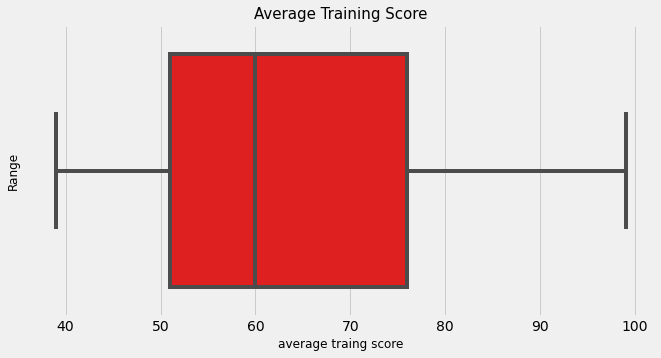

In [23]:
# checking the boxplots for the columns where we suspect for outliers.
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('fivethirtyeight')

#Boxplot for average training score
plt.title('Average Training Score', fontsize = 15)
sns.boxplot(train_dataset['avg_training_score'],color='red')
plt.xlabel('average traing score',fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.show()

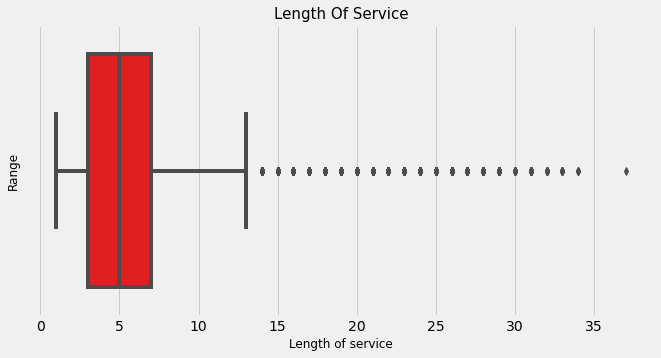

In [24]:
# checking the boxplots for the columns where we suspect for outliers.
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('fivethirtyeight')

#Boxplot for average training score
plt.title('Length Of Service', fontsize = 15)
sns.boxplot(train_dataset['length_of_service'],color='red')
plt.xlabel('Length of service',fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.show()

In the Length of service attribute, we can see some are present after the max value, which can be termed to be as Outliers. As the values are not very far and huge, we do not need to remove these values.

## Univariate Analysis

plotting pie charts for the columns where we have very few categories.

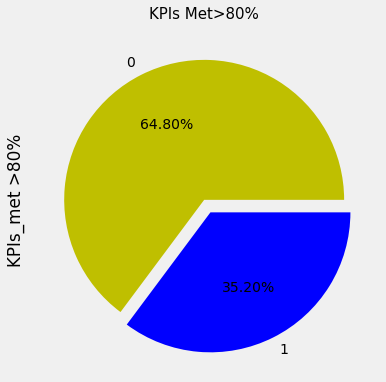

In [25]:
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('fivethirtyeight')

# Pie chart for KPIs Met > 80%
train_dataset['KPIs_met >80%'].value_counts().plot(kind = 'pie', explode = [0,0.1],
                                                autopct = '%.2f%%', labels = ['0','1'],colors = ['y','b'])
plt.title('KPIs Met>80%',fontsize = 15)
plt.show()

We can see that there are 64.80% of the employee whose KPIs met > 80% do not met and remaining are very less.

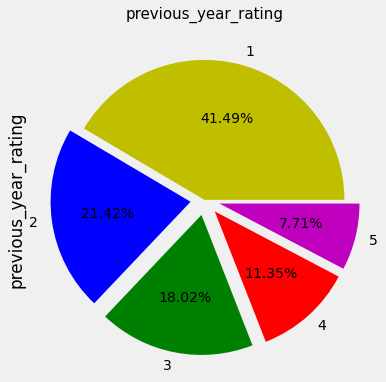

In [26]:
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('fivethirtyeight')

# Pie chart for previous year rating of the employees.
train_dataset['previous_year_rating'].value_counts().plot(kind = 'pie', explode = [0,0.1,0.11,0.111,0.1111],
                                                autopct = '%.2f%%', labels = ['1','2','3','4','5'],colors = ['y','b','g','r','m'])
plt.title('previous_year_rating',fontsize = 15)
plt.show()

From the above chart we can see that most employees has rating equal to 1.

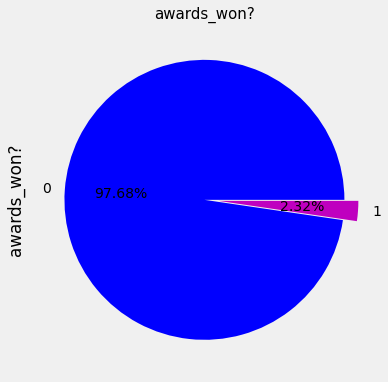

In [27]:
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('fivethirtyeight')

# Pie chart for awards won of the employees.
train_dataset['awards_won?'].value_counts().plot(kind = 'pie', explode = [0,0.1],
                                                autopct = '%.2f%%', labels = ['0','1'],colors = ['b','m'])
plt.title('awards_won?',fontsize = 15)
plt.show()

From the above chart we can see that only 2.32% of employee has won awards.
Which is very less.

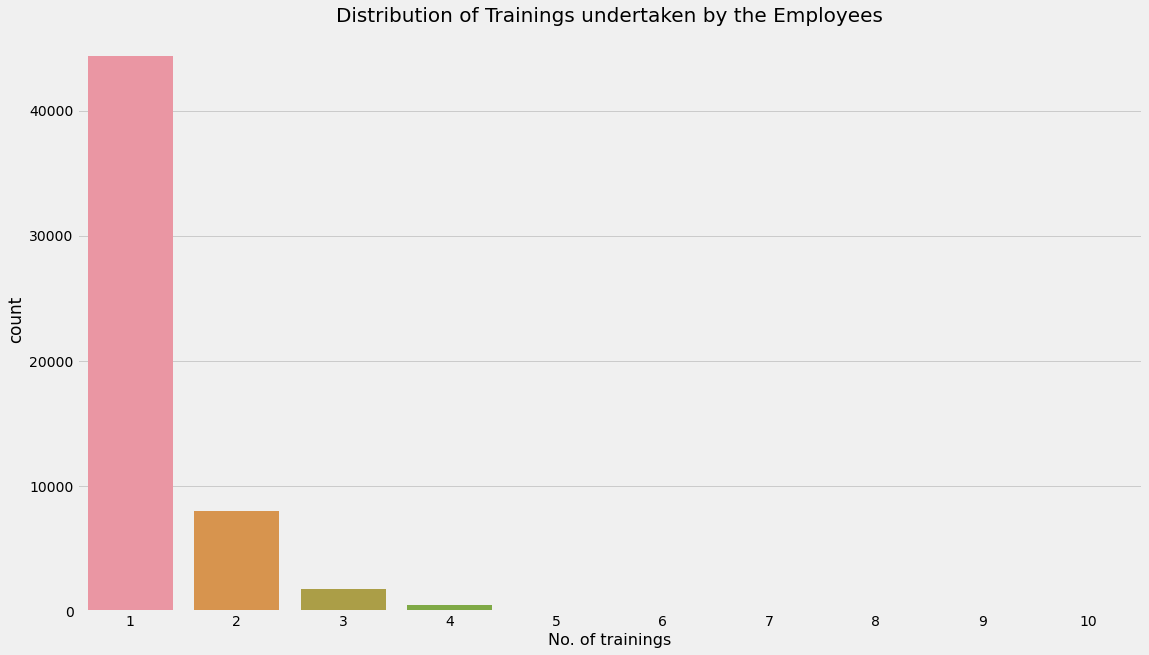

In [28]:
# Checking the distriburtion of trainings undertaken by the employees.

plt.rcParams['figure.figsize'] = (17, 10)
sns.countplot(train_dataset['no_of_trainings'])
plt.xlabel('No. of trainings', fontsize = 16)
plt.title('Distribution of Trainings undertaken by the Employees',fontsize = 20)
plt.show()

It is very clearly visible that 80% of the employees have taken the training only once,and there are negligible no. of employees, who took trainings more than thrice.

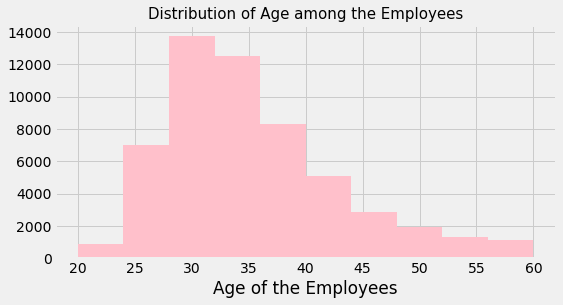

In [29]:
# checking the Age of the Employees

plt.rcParams['figure.figsize'] = (8, 4)
plt.hist(train_dataset['age'], color = 'pink')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.show()

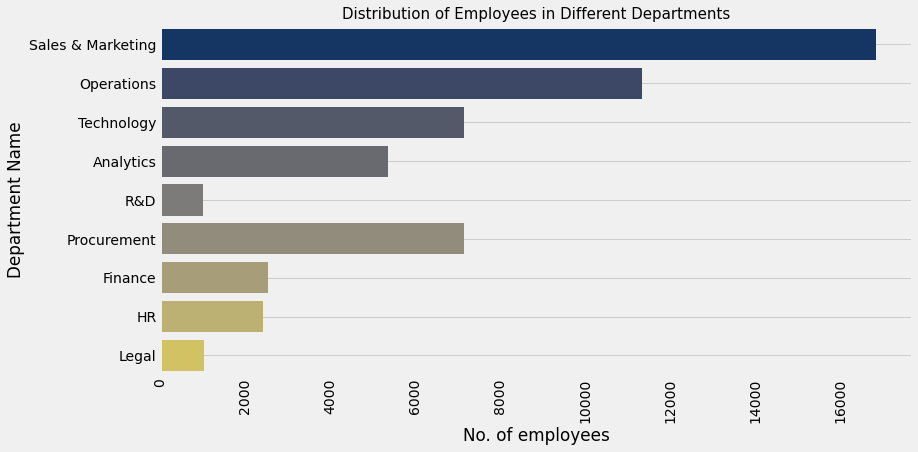

In [30]:
#checking different Departments

plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = train_dataset['department'], palette = 'cividis', orient = 'v')
plt.xlabel('No. of employees')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()
plt.xticks(rotation = 90)
plt.show()

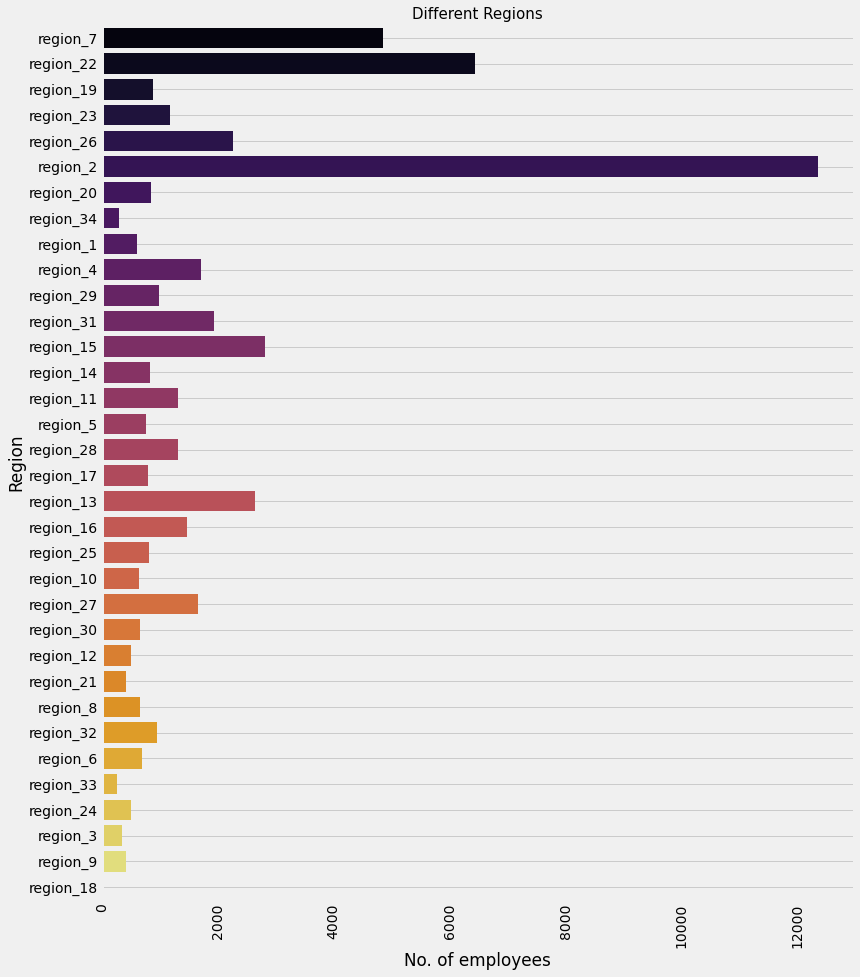

In [31]:
# lets check distribution of different Regions

plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = train_dataset['region'], palette = 'inferno', orient = 'v')
plt.xlabel('No. of employees')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

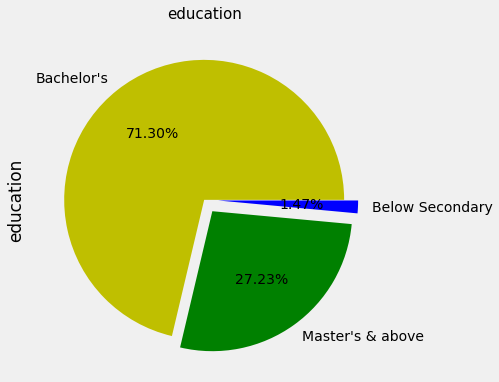

In [32]:
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('fivethirtyeight')
l = train_dataset['education'].value_counts().index

# Pie chart for Educations.
train_dataset['education'].value_counts().plot(kind = 'pie', explode = [0,0.1,0.1],
                                                autopct = '%.2f%%', labels = l,colors = ['y','g','b'])
plt.title('education',fontsize = 15)
plt.show()

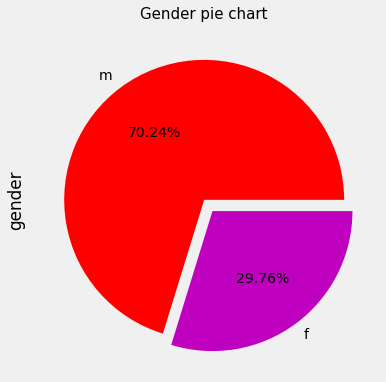

In [33]:
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('fivethirtyeight')
l = train_dataset['gender'].value_counts().index

# Pie chart for Educations.
train_dataset['gender'].value_counts().plot(kind = 'pie', explode = [0,0.1],
                                                autopct = '%.2f%%', labels = l,colors = ['r','m'])
plt.title('Gender pie chart',fontsize = 15)
plt.show()

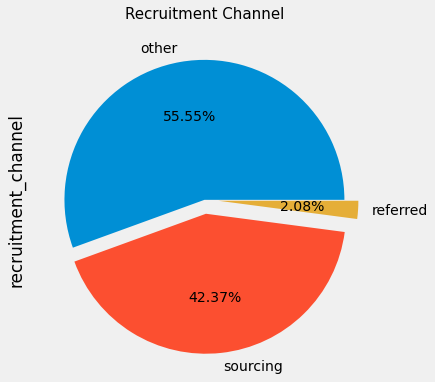

In [34]:
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('fivethirtyeight')
l = train_dataset['recruitment_channel'].value_counts().index

# Pie chart for Educations.
train_dataset['recruitment_channel'].value_counts().plot(kind = 'pie', explode = [0,0.1,0.1],
                                                autopct = '%.2f%%', labels = l)
plt.title('Recruitment Channel',fontsize = 15)
plt.show()

From the above pie charts displayed for representing education, gender and Recruitment Channel.
we found that
- Very few employees are actually working only after their secondary education.
- Females are minority as compared to their male counterparts.
- There are very less no. of Referred employees i.e, most of the employees are recruited either by sourceing or some other recruitment agencies, source etc.

## Bivariate Analysis

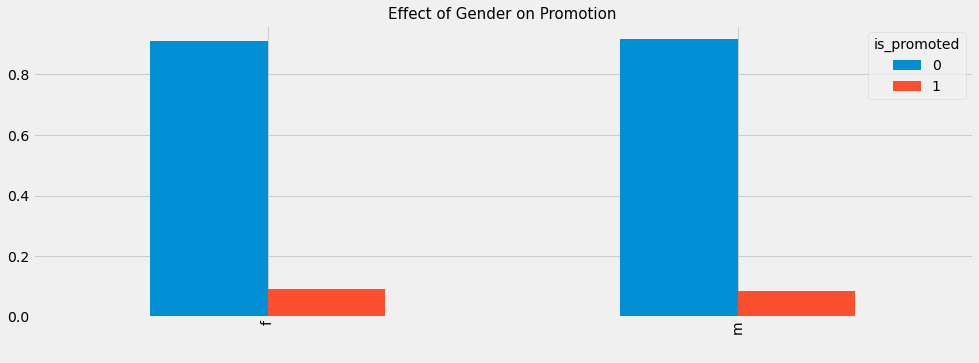

In [35]:
# Comparing Gender gap in the promotion
plt.rcParams['figure.figsize'] = (15, 5)

x = pd.crosstab(train_dataset['gender'], train_dataset['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

As we know that female are in minority when compare to male but in the graph we can clearly see that there is no big difference when comparing the promotion of male and female. 

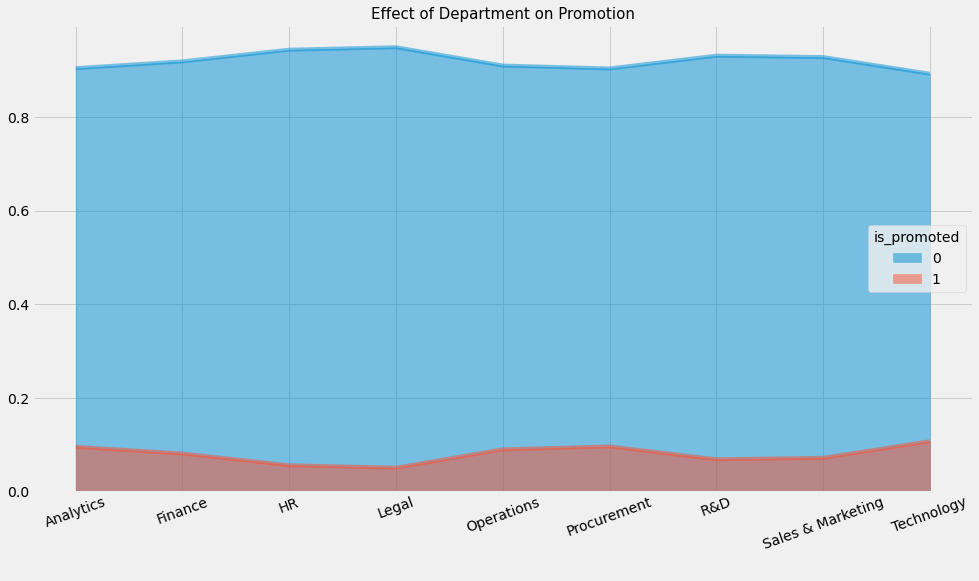

In [36]:
#comparing the effect of different Departments and Promotion

plt.rcParams['figure.figsize'] = (15,8)
x = pd.crosstab(train_dataset['department'], train_dataset['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

From, the above chart we can see that almost all the Departments have a very similar effect on Promotion. So, we can consider that all the Departments have a similar effect on the promotion. Also, this column comes out to be lesser important in making a Machine Learning Model, as it does not contribute at all when it comes to Predicting whether the Employee should get Promotion.

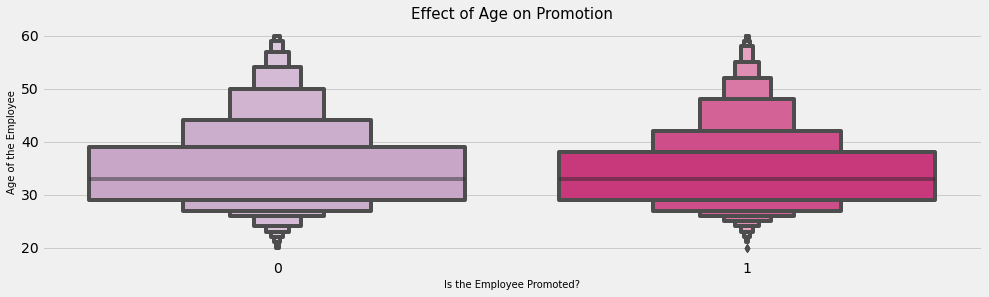

In [37]:
# Effect of Age on the Promotion

plt.rcParams['figure.figsize'] = (15,4)

sns.boxenplot(train_dataset['is_promoted'], train_dataset['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

We cannot inference much from the age of an employee as the result are similar.

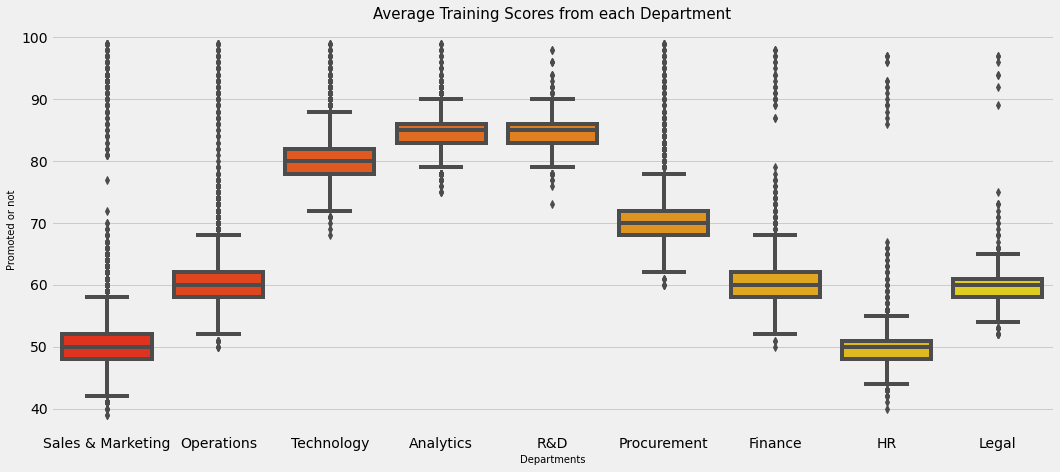

In [38]:
# Department vs average Training Score
plt.rcParams['figure.figsize'] = (16, 7)

sns.boxplot(train_dataset['department'], train_dataset['avg_training_score'], palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

- We can see that Analytics and R&D departments has higher average training scores then any other deparments.
- Sales & marketing has the lowest average training score in the deparments.

## Multi-Variate Analysis

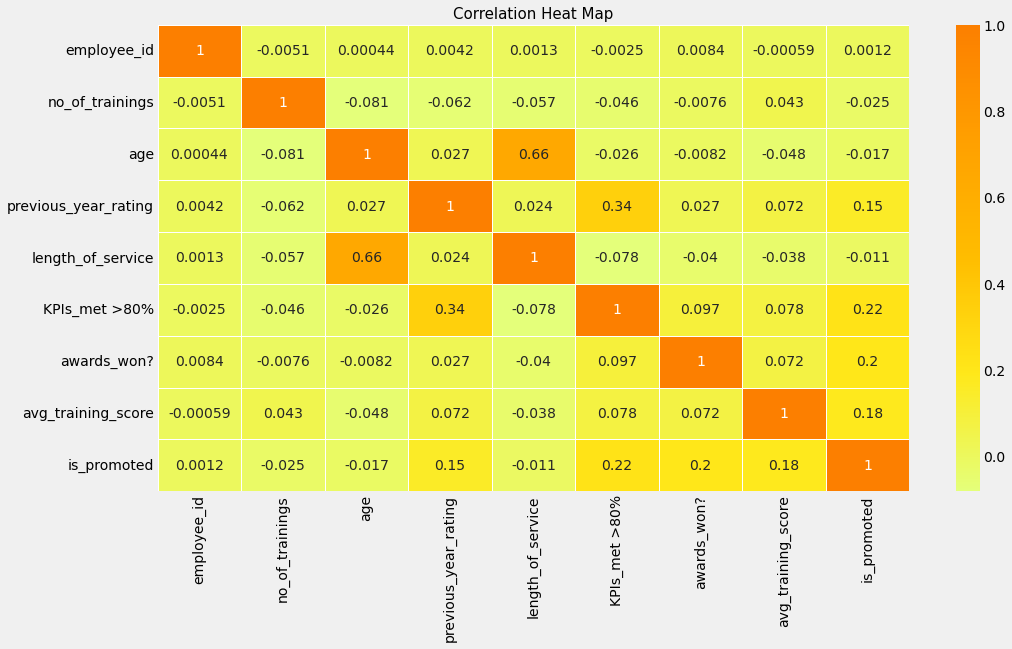

In [39]:
# Check the heat map for the Data with respect to correlation

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train_dataset.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

Here, we can see some obvious results, that is Length of Service, and Age are Highly Correlated.
Also, KPIs, and Previous year rating are correlated to some extent, hinting that there is some relation.

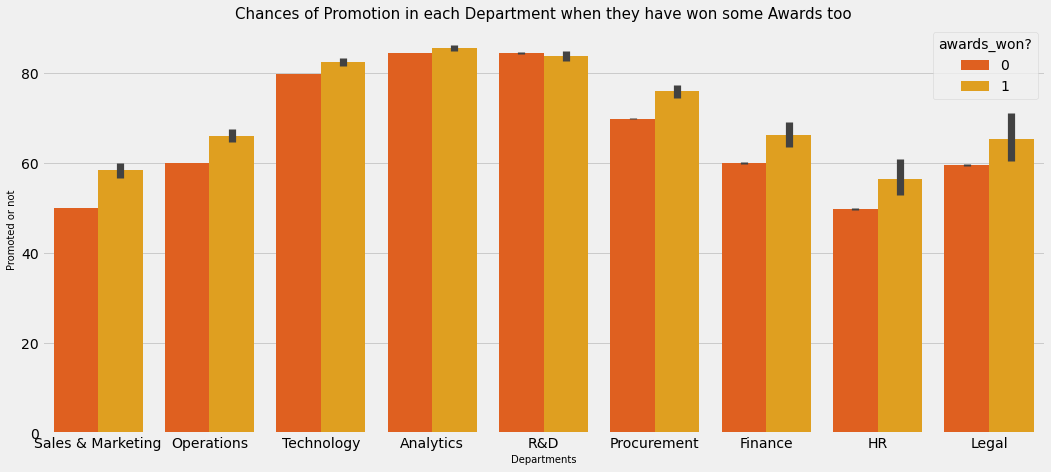

In [40]:
# checking the relation of departments and promotion when they won awards.

plt.rcParams['figure.figsize'] = (16, 7)

sns.barplot(train_dataset['department'], train_dataset['avg_training_score'], hue = train_dataset['awards_won?'], palette = 'autumn')
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

Employee in department Sales & Marketing,Procument,finance,Hr, and Legal has hisher change of promotion if they had won a award.

## Feature Engineering

In [41]:
# we should create some extra feature from existing features to imporve our model.

# Creating a metric of sum by adding awards won?, KPIs_met>80%, previous year rating
train_dataset['sum_metric'] = train_dataset['awards_won?']+train_dataset['KPIs_met >80%'] + train_dataset['previous_year_rating']
test_dataset['sum_metric'] = test_dataset['awards_won?']+test_dataset['KPIs_met >80%'] + test_dataset['previous_year_rating']

# creating a total score column by multiplying average training score and no. of trainings.
train_dataset['total_score'] = train_dataset['avg_training_score'] * train_dataset['no_of_trainings']
test_dataset['total_score'] = test_dataset['avg_training_score'] * test_dataset['no_of_trainings']

In [42]:
# Removing some of the columns which are not very useful for predicting the prmotion.

# we already know that recuirtment channel is very least related to promotion so we will drop it.
# Region seems to contribute very less, wgen it comes to promotion.
# also employee_id is not useful so we will drop it too.

train_dataset = train_dataset.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test_dataset = test_dataset.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

#checking the columns of training data set after feature enginering.
train_dataset.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score'],
      dtype='object')

In [43]:
'''
lets check the no. of employee who did not get an award, did not acheive 80+ KPI, previous_year_rating as 1
and avg_training score is less than 40
but, still got promotion.
''' 

train_dataset[(train_dataset['KPIs_met >80%'] == 0) & (train_dataset['previous_year_rating'] == 1.0) & 
      (train_dataset['awards_won?'] == 0) & (train_dataset['avg_training_score'] < 60) & (train_dataset['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
31860,Sales & Marketing,Bachelor's,m,1,27,1.0,2,0,0,58,1,1.0,58
51374,Sales & Marketing,Bachelor's,m,1,31,1.0,5,0,0,58,1,1.0,58


In [44]:
# As we can see that these two row will have huge negative effect on the model so we will delete it.

#checking the shape of the training dataset before deleting the rows.
print('Before deleting the above two rows:', train_dataset.shape)

#dropping the rows.

train_dataset = train_dataset.drop(train_dataset[(train_dataset['KPIs_met >80%'] == 0) & (train_dataset['previous_year_rating'] == 1.0) & 
      (train_dataset['awards_won?'] == 0) & (train_dataset['avg_training_score'] < 60) & (train_dataset['is_promoted'] == 1)].index)

#checking the shape of the training dataset After deleting the rows.
print('After deleting the above two rows:', train_dataset.shape)

Before deleting the above two rows: (54808, 13)
After deleting the above two rows: (54806, 13)


## Dealing with Categorical data

In [45]:
# checking the categorical columns present in the data.
train_dataset.select_dtypes('object').head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [46]:
# check the value counts for the education columns
train_dataset['education'].value_counts()

Bachelor's          39076
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [47]:
# Now we should encode the categorical columns to convert them into numerical columns.

# encoding the education in their degree of importance.
train_dataset['education'] = train_dataset['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test_dataset['education'] = test_dataset['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))


In [48]:
# using label encoding for gender and department to convert them into Numerical.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_dataset['department'] = le.fit_transform(train_dataset['department'])
test_dataset['department'] = le.fit_transform(test_dataset['department'])
train_dataset['gender'] = le.fit_transform(train_dataset['gender'])
test_dataset['gender'] = le.fit_transform(test_dataset['gender'])

#checking for any categorical columns left after encoding.
print(train_dataset.select_dtypes('object').columns)
print(test_dataset.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [49]:
# head of the dataset after encoding
train_dataset.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,3.0,73


## Splitting the Data

In [50]:
# splitting the target data from the training data
y = train_dataset['is_promoted']
x = train_dataset.drop(['is_promoted'], axis = 1)
x_test = test_dataset

# Checking the shapes of the newly formed datasets
print("Shape of the x :",x.shape)
print("Shape of the y :",y.shape)
print("Shape of the x_test :",x_test.shape)

Shape of the x : (54806, 12)
Shape of the y : (54806,)
Shape of the x_test : (23490, 12)


## Resampling

In [51]:
# As we know that our target class is highly imbalanced so we to resample it.
# we will use oversampling technique to resample the data as under sampling will result in data loss.
# SMOTE algorithm.

from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

# checking the shape of x and y after resampling it.
print(x_resample.shape)
print(y_resample.shape)

(100280, 12)
(100280,)


In [52]:
# checking the value counts of our target variable.
print("Before resampling :")
print(y.value_counts())

print("After resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before resampling :
0    50140
1     4666
Name: is_promoted, dtype: int64
After resampling :
0    50140
1    50140
Name: 0, dtype: int64


In [53]:
# Creating Validation sset from the training dataset so that we can check whether the model we have created is good enough.
# To do that we need to import train_test_split library from sklearn.

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# printing the shapes again

print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (80224, 12)
Shape of the y Train : (80224, 1)
Shape of the x Valid : (20056, 12)
Shape of the y Valid : (20056, 1)
Shape of the x Test : (23490, 12)


## Feature Scaling

In [54]:
# Now we will scale all the features of the dataset into the same scale.
# we will use the standardization method.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

## Machine Learning Modeling

In [55]:
# We will use Decision Tree Classifier
# It helps to classify the data

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_valid)

Training Accuracy : 0.9903146190666134
Testing Accuracy : 0.9383725568408456


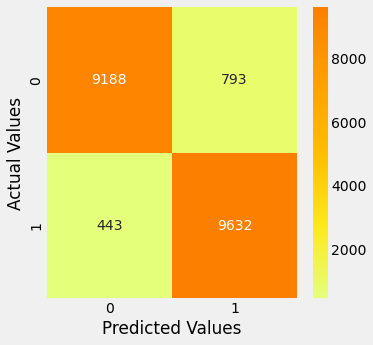

In [56]:
# now we will create a confusion matrix and classification_report
# It will help us check the accuracy of our model.

from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model.score(x_train,y_train))
print("Testing Accuracy :", model.score(x_valid,y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(cm,annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

From the confusion matrix we can conclude that
- Our model correctly predicted that 9202 employees did not get promoted.
- our model false predicted that 779 employees where promoted but actually they didn't.
- Our model correctly predicted that 9593 employees get promoted.
- Our model false predicted that 482 employees did not get promoted but actually they get promoted.

In [57]:
# Checking the Classification Report

cr = classification_report(y_valid,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      9981
           1       0.92      0.96      0.94     10075

    accuracy                           0.94     20056
   macro avg       0.94      0.94      0.94     20056
weighted avg       0.94      0.94      0.94     20056



## Real Time Prediction

In [58]:
# Once again checking the descriptive statistics of our training dataset.
train_dataset.describe()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
count,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000
mean,4.972722,2.257636,0.702368,1.253020,34.804127,3.304565,5.865599,0.351987,0.023173,63.386947,0.085137,3.679725,79.771430
std,2.506061,0.469723,0.457221,0.609273,7.660219,1.214712,4.265138,0.477594,0.150453,13.371764,0.279088,1.463326,43.879739
min,0.000000,1.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,1.000000,39.000000
25%,4.000000,2.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,3.000000,53.000000
50%,5.000000,2.000000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,4.000000,64.000000
75%,7.000000,3.000000,1.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,5.000000,84.000000
max,8.000000,3.000000,1.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,7.000000,710.000000


## Performing some Real time predictions on top of the Model that we just created using Decision Tree Classifier

## The parameters we have in our Model
'''
department -> The values are from 0 to 8, (Department does not matter a lot for promotion)
education -> The values are from 0 to 3 where Masters-> 3, Btech -> 2, and secondary ed -> 1
gender -> the values are 0 for female, and 1 for male
no_of_trainings -> the values are from 0 to 5
age -> the values are from 20 to 60
previou_year_rating -> The values are from 1 to 5
length_of service -> The values are from 1 to 37
KPIs_met >80% -> 0 for Not Met and 1 for Met
awards_won> -> 0-no, and 1-yes
avg_training_score -> ranges from 40 to 99
sum_metric -> ranges from 1 to 7
total_score -> 40 to 710
'''

In [59]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(model, step = 1, min_features_to_select = 6, n_jobs = -1)
rfecv.fit(x_train,y_train)
prediction = rfecv.predict(np.array([[2, #department code
                                      3, #masters degree
                                      1, #male
                                      1, #1 training
                                      30, #30 years old
                                      5, #previous year rating
                                      10, #length of service
                                      1, #KPIs met >80%
                                      1, #awards won
                                      95, #avg training score
                                      7, #sum of metric 
                                      700 #total score
                                     ]]))

print("Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion :", prediction)

Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion : [1]
